# Plotings: Pie Charts, Box Plots, Scatter Plots, and Bubble Plots

In [31]:
#Import primary modules.
import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0


Matplotlib version:  3.1.1


###### Upload data 

In [32]:
df_can = pd.read_excel(
    'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx',
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2
    )

In [33]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [34]:
#remove unecessary columns
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

In [35]:
df_can.head()

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [36]:
# rename some columns 
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

In [37]:
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [38]:
# for sake of consistency, let's also make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

In [39]:
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [40]:

# set the country name as index - useful for quickly looking up countries using .loc method
df_can.set_index('Country', inplace=True)

# add total column
df_can['Total'] = df_can.sum(axis=1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print('data dimensions:', df_can.shape)

data dimensions: (195, 38)


###### Visualizing Data using Matplotlib

###### Pie Charts
Step 1: Gather data.

We will use pandas groupby method to summarize the immigration data by Continent. The general process of groupby involves the following steps:

    Split: Splitting the data into groups based on some criteria.
    Apply: Applying a function to each group independently: .sum() .count() .mean() .std() .aggregate() .apply() .etc..
    Combine: Combining the results into a data structure

In [45]:
# group countries by continents and apply sum() function 
df_continents = df_can.groupby('Continent', axis=0).sum()
print(type(df_can.groupby('Continent', axis=0)))

df_continents.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


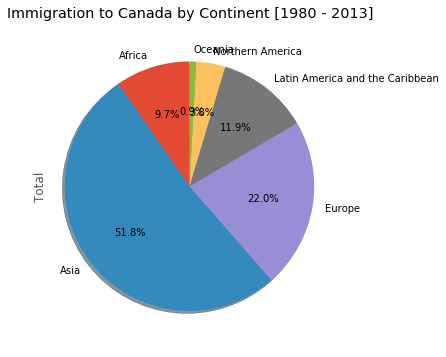

In [46]:
# autopct create %, start angle represent starting point
df_continents['Total'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )

plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

In [47]:
# to get a dataframe, place extra square brackets around 'Japan'.
df_japan = df_can.loc[['Japan'], years].transpose()
df_japan.head()

Country,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


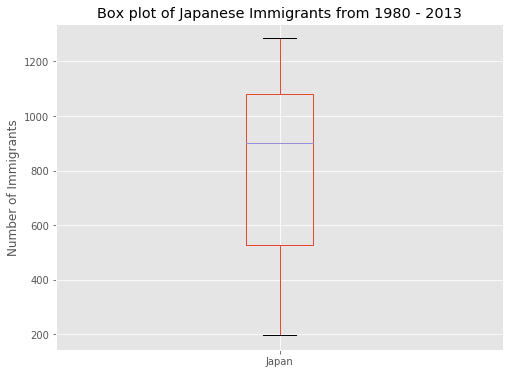

In [48]:
# box plot 
df_japan.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Japanese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

In [49]:
df_japan.describe()

Country,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


###### Question: Compare the distribution of the number of new immigrants from India and China for the period 1980 - 2013.

In [51]:
#The correct answer is:
df_CI= df_can.loc[['China', 'India'], years].transpose()
df_CI.head()

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


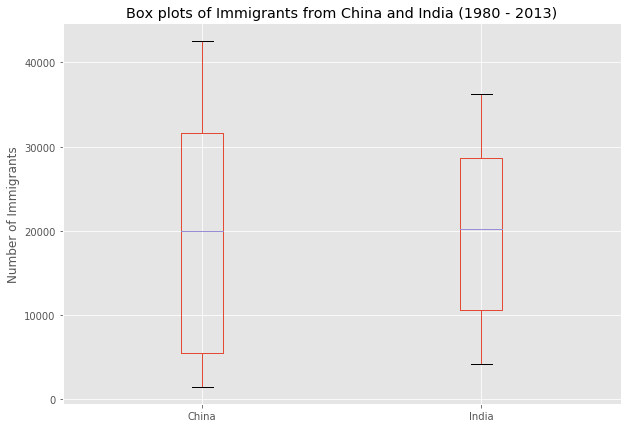

In [53]:
df_CI.plot(kind='box', figsize=(10, 7))

plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.ylabel('Number of Immigrants')
plt.show()

In [54]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


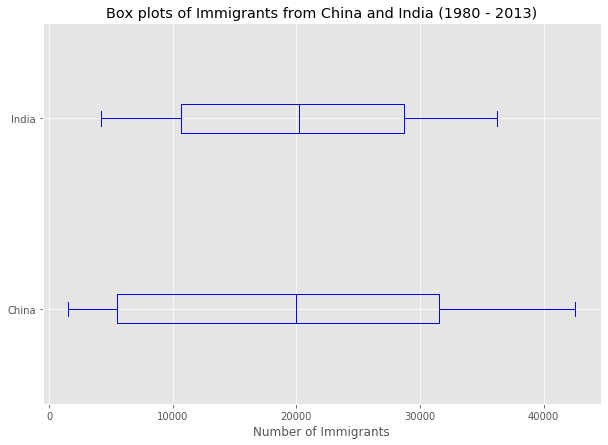

In [55]:
# horizontal box plots
df_CI.plot(kind='box', figsize=(10, 7), color='blue', vert=False)

plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.xlabel('Number of Immigrants')

plt.show()